# Effector usage tutorial

This tutorial will guide you through the basic concepts of `Effector` and show you how to use it in your project.
All methods in `effector` require two inputs: 

- the dataset, which is a `np.array` of shape `(n_samples, n_features)`
- the `blackbox` model, which is a function that takes a batched input, i.e. a `np.array` of shape `(n_samples, n_features)`, and returns the predictions, i.e. a `np.array` of shape `(n_samples,)`

In [45]:
import effector
import numpy as np

np.random.seed(21)

X = np.random.uniform(-1, 1, (100, 2))
f = lambda x: x[:, 0]**2 + x[:, 0]**4 * (x[:, 1] > 0)


## Global Effect

To simplest `effector` usage requires a call to `effector.<method_name>` with the dataset, function, and feature to visualize—all in a single line to get a plot instantly.

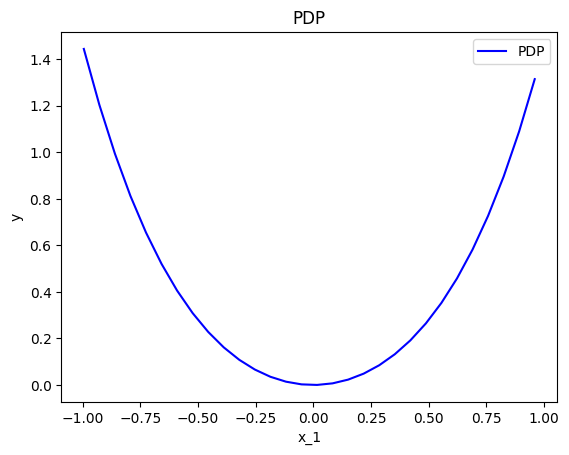

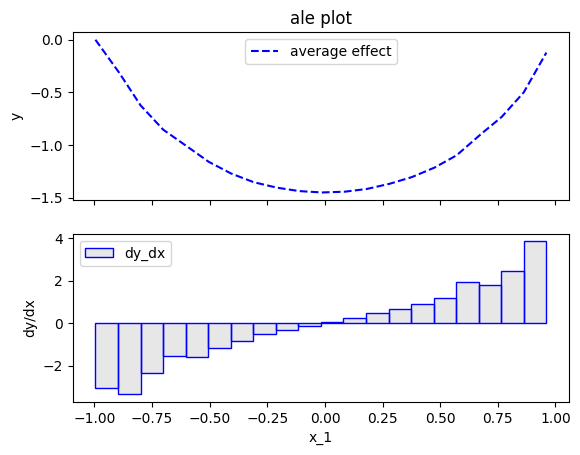

In [46]:
effector.PDP(X, f).plot(feature=0)
effector.ALE(X, f).plot(feature=0)

All methods have two key parameters: centering and heterogeneity.

### Parameter `centering`

Notice that each method positions the feature effect plot at a different y-axis level, which hardens comparisons. 
To standardize centering, you can use the `centering` parameter. 
Setting `centering=True` is equivalent to `centering="zero_integral"`, centering the plot around the y-axis. 
Alternatively, `centering="zero_start"` aligns the leftmost point at y=0. 

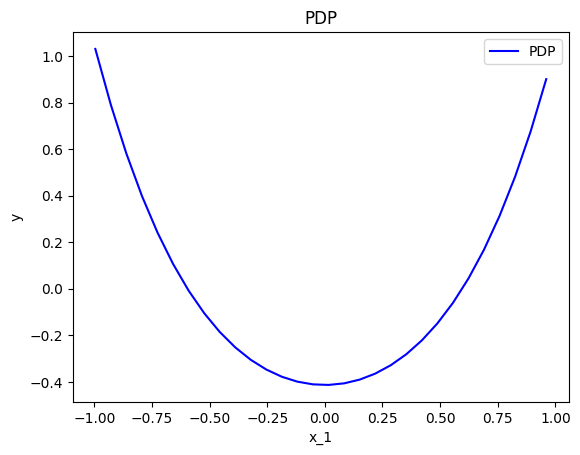

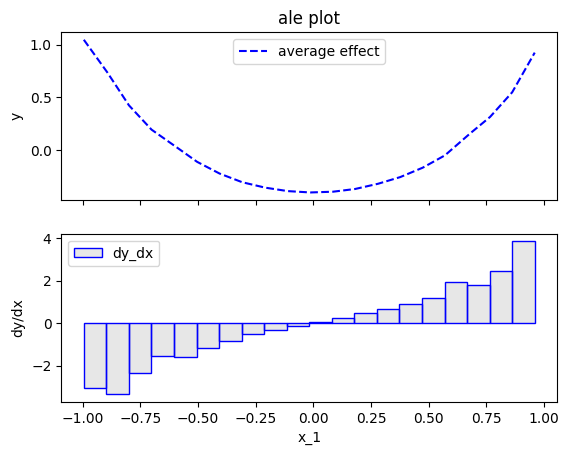

In [47]:
# Important parameters: Centering
effector.PDP(X, f).plot(feature=0, centering=True)
effector.ALE(X, f).plot(feature=0, centering=True)

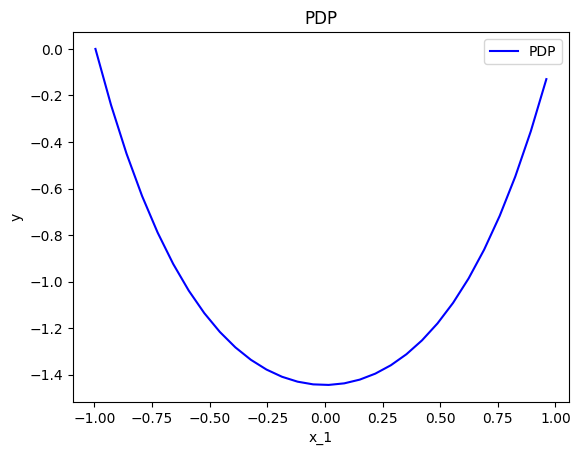

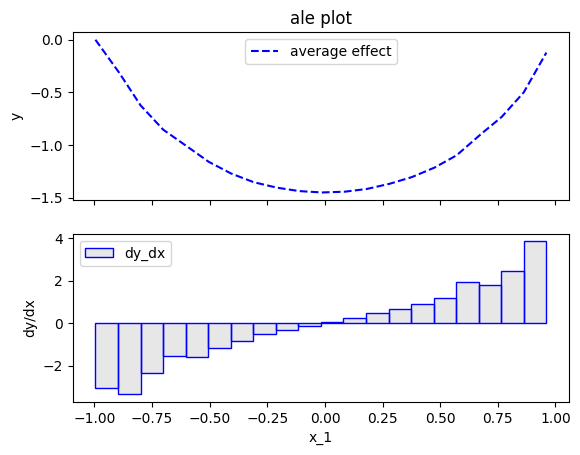

In [48]:
effector.PDP(X, f).plot(feature=0, centering="zero_start")
effector.ALE(X, f).plot(feature=0, centering="zero_start")

### Parameter `heterogeneity`

Heterogeneity reflects how accurately the global effect represents all instances, or, in other words, the extent to which individual instances deviate from the global effect. Low heterogeneity indicates minimal deviation, while high heterogeneity suggests greater deviation.

To visualize heterogeneity, set `heterogeneity=True` within the `.plot` call. This will display a red region highlighting heterogeneity; the visualization style varies by method.

Some methods have specific ways to show heterogeneity. For example, PDP uses ICE plots. In such cases, the `heterogeneity` parameter can take specific string values indicating the chosen approach, like `heterogeneity="ice"`.

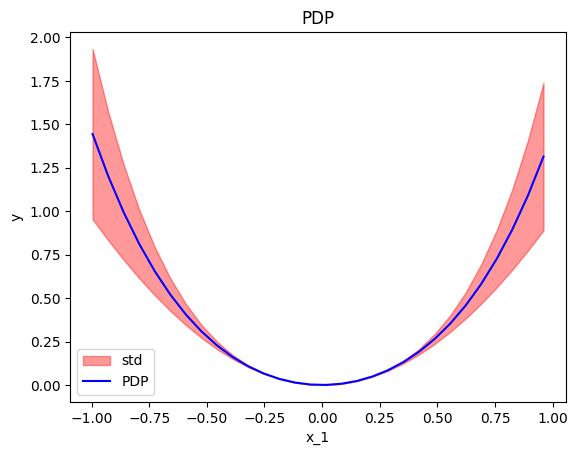

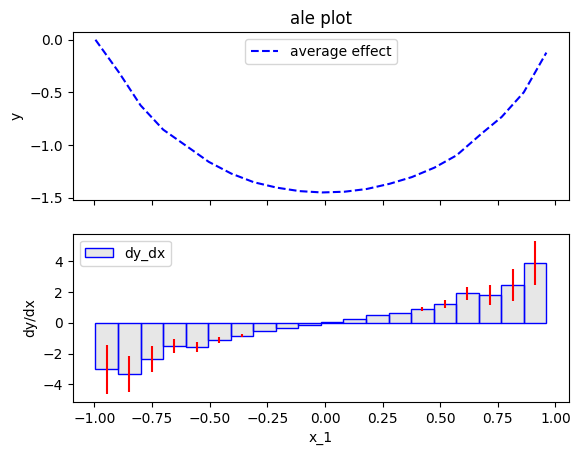

In [49]:
effector.PDP(X, f).plot(feature=0, heterogeneity=True)
effector.ALE(X, f).plot(feature=0, heterogeneity=True)

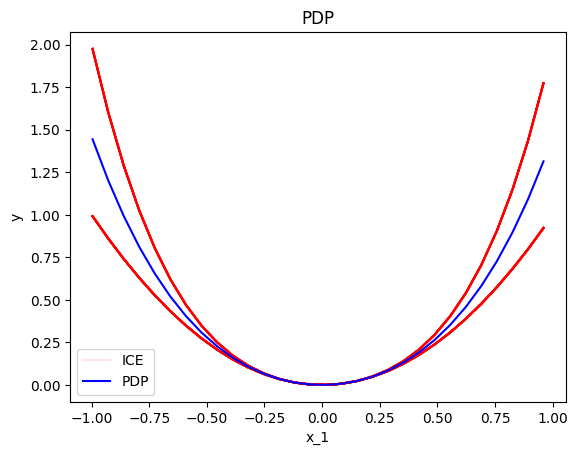

In [50]:
effector.PDP(X, f).plot(feature=0, heterogeneity="ice")

In [51]:
# TODO: continue the tutorial from here.

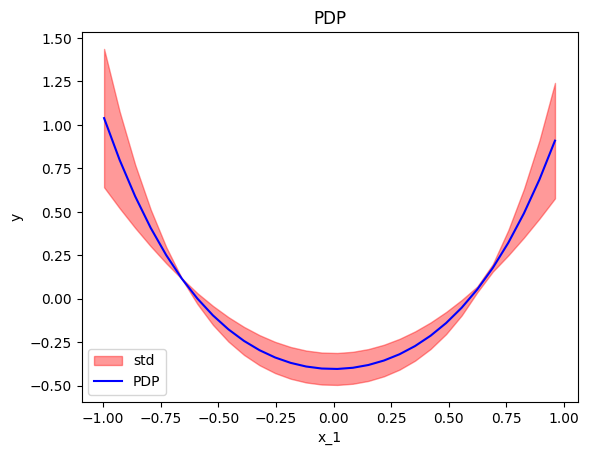

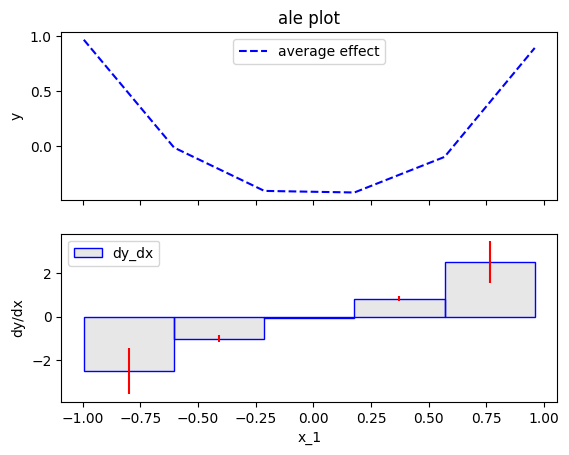

In [52]:


# Global effect PDP - more control
pdp = effector.PDP(X, f)
pdp.fit(features="all", centering=True, points_for_centering=1000, use_vectorized = False)

# without heterogeneity
y = pdp.eval(feature=0, xs=np.linspace(-1, 1, 1000), centering=True)

# with heterogeneity
y, std = pdp.eval(feature=0, xs=np.linspace(-1, 1, 1000), centering=True, heterogeneity=True)

# Plot
pdp.plot(feature=0, centering=True, heterogeneity=True)


# Global effect ALE - more control
ale = effector.ALE(X, f)

binning_method = effector.binning_methods.Fixed(nof_bins=5, min_points_per_bin=10)
ale.fit(features="all", centering=True, binning_method=binning_method)

# without heterogeneity
y = ale.eval(feature=0, xs=np.linspace(-1, 1, 1000), centering=True)

# with heterogeneity
y, std = ale.eval(feature=0, xs=np.linspace(-1, 1, 1000), centering=True, heterogeneity=True)

# Plot
ale.plot(feature=0, centering=True, heterogeneity=True)